In [53]:
import sys
sys.path.append('../')

In [54]:
from scripts.utils import data_path
from scripts.cross_match_scripts import build_keras_model, plot_metrics, assess_classifier, save_keras_classifier, assess_classifier, photo_prior_create_train_test_validation_data
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
pd.set_option('display.max_columns', 500)
import seaborn as sns
import numpy as np
import pickle
%matplotlib inline
photo_cat_scaled = pd.read_pickle('model/train_test_validation_data.pkl')

load_models = True


# Classification model: Keras - Sequential neural network

## GRZW1W2 data - baseline model

In [55]:
learning_dict = photo_prior_create_train_test_validation_data(photo_cat_scaled=photo_cat_scaled, features_cols = 'grzw1w2')

total x-ray sources:  36931
total non-x-ray sources:  170370
total sources:  207301
number of x-ray sources per flux bin:
x_ray_flux_bin
0    36931
dtype: int64
number of non-x-ray sources per flux bin:
x_ray_flux_bin
0    170370
dtype: int64
x-ray flux bins:
[3.00076359e-15 9.70410542e-12]
********************
flux bin:  3.0007635913564e-15 9.7041054224882e-12
train features: 
  ['mag_g', 'mag_r', 'mag_z', 'mag_w1', 'mag_w2', 'col_gr', 'col_rz', 'col_gz', 'col_zw1', 'col_rw2', 'col_w1w2']
train size examples - filed:  95407
train size examples - x-ray: 20681
test size examples - filed:  23852
test size examples - x-ray 5171
validation size examples - filed:  51111
validation size examples - x-ray: 11079
downsampled field sources:  False
data is scaled


In [56]:
X_train, y_train, X_test, y_test, X_val, y_val, class_weight_train = learning_dict[0]['X_train'], learning_dict[0]['y_train'], learning_dict[0]['X_test'], learning_dict[0]['y_test'], learning_dict[0]['X_val'], learning_dict[0]['y_val'], learning_dict[0]['class_weight_train']
initial_bias = np.log([np.sum(y_test)/np.sum(~y_test)])

model_grzw1w2, early_stopping = build_keras_model(input_features_shape=X_train.shape[1],
                                    activation='tanh',
                                    layers_num=(8,8,8,8),
                                    dropout_rate=0.1,
                                    initial_bias=initial_bias,)


if load_models:
    model_grzw1w2 = tf.keras.models.load_model('model/nnmag_grzw1w2.keras_nn')
    history_grzw1w2 =  pickle.load(open('model/nnmag_grzw1w2.keras_nn/history', "rb"))
    history_grzw1w2['epoch'] = np.arange(len(history_grzw1w2['loss']))

#tf.keras.utils.plot_model(model_grzw1w2)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 8)                 96        
                                                                 
 dense_58 (Dense)            (None, 8)                 72        
                                                                 
 dropout_31 (Dropout)        (None, 8)                 0         
                                                                 
 dense_59 (Dense)            (None, 8)                 72        
                                                                 
 dropout_32 (Dropout)        (None, 8)                 0         
                                                                 
 dense_60 (Dense)            (None, 8)                 72        
                                                                 
 dropout_33 (Dropout)        (None, 8)               

In [57]:
if not load_models:

    history_grzw1w2 = model_grzw1w2.fit(
    X_train,
    y_train,
    batch_size=500,
    epochs=150,
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping],
    class_weight=class_weight_train,
    verbose=0)

    with open('model/nnmag_grzw1w2.keras_nn/history', 'wb') as file_pi:
        pickle.dump(history_grzw1w2.history, file_pi)



Optimal threshold: 0.70
Optimal precision: 0.75


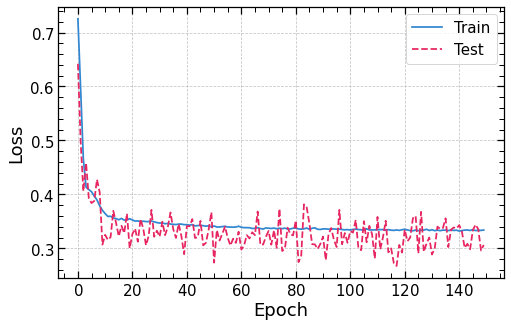

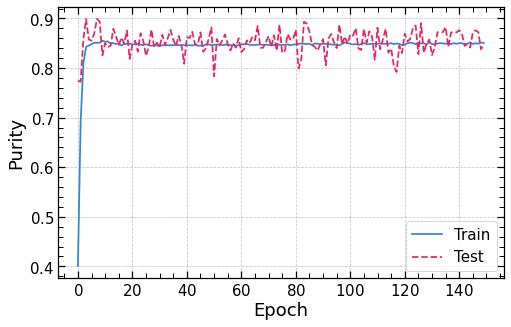

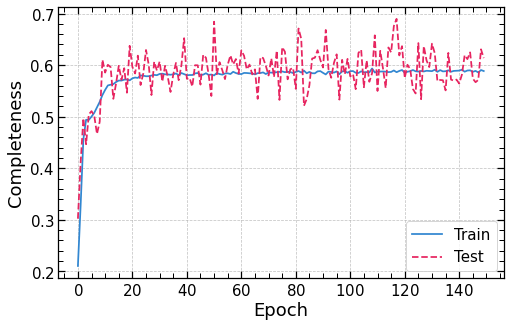

<Figure size 360x360 with 0 Axes>

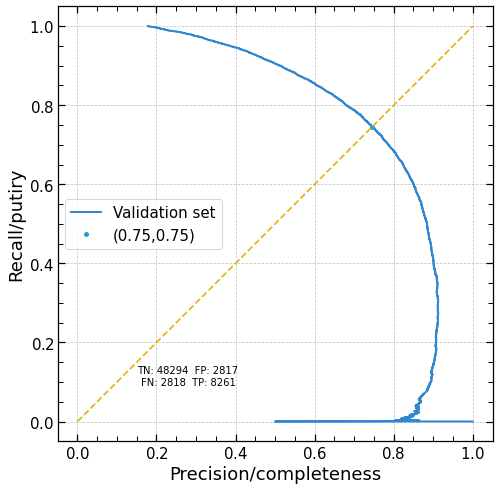

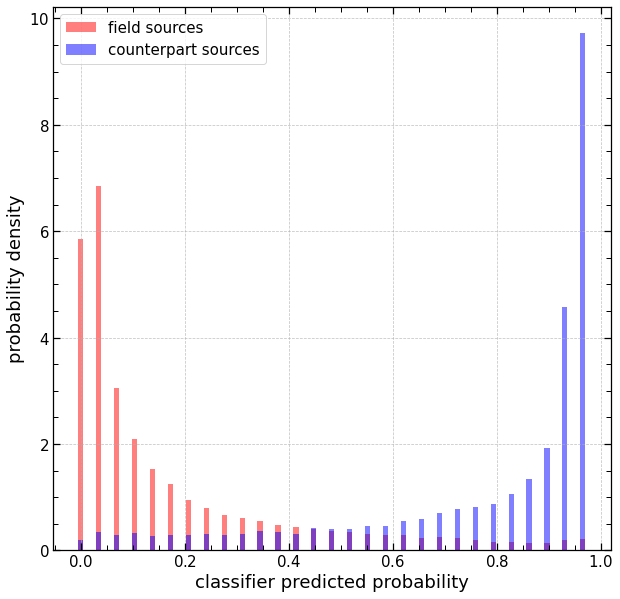

In [58]:
plot_metrics(history_grzw1w2)
_,_,_, hist_df = assess_classifier(model_grzw1w2, X_val, y_val);

if not load_models: save_keras_classifier(model_grzw1w2, hist_df, 'model/nnmag_grzw1w2')


## GRZ data - pessimistic model

In [59]:
learning_dict = photo_prior_create_train_test_validation_data(photo_cat_scaled=photo_cat_scaled, features_cols = 'grz')

total x-ray sources:  38161
total non-x-ray sources:  309342
total sources:  347503
number of x-ray sources per flux bin:
x_ray_flux_bin
0    38161
dtype: int64
number of non-x-ray sources per flux bin:
x_ray_flux_bin
0    309342
dtype: int64
x-ray flux bins:
[3.00076359e-15 9.70410542e-12]
********************
flux bin:  3.0007635913564e-15 9.7041054224882e-12
train features: 
  ['mag_g', 'mag_r', 'mag_z', 'col_gr', 'col_rz', 'col_gz']
train size examples - filed:  173232
train size examples - x-ray: 21370
test size examples - filed:  43308
test size examples - x-ray 5343
validation size examples - filed:  92802
validation size examples - x-ray: 11448
downsampled field sources:  False
data is scaled


In [60]:
X_train, y_train, X_test, y_test, X_val, y_val, class_weight_train = learning_dict[0]['X_train'], learning_dict[0]['y_train'], learning_dict[0]['X_test'], learning_dict[0]['y_test'], learning_dict[0]['X_val'], learning_dict[0]['y_val'], learning_dict[0]['class_weight_train']
initial_bias = np.log([np.sum(y_test)/np.sum(~y_test)])

model_grz, early_stopping = build_keras_model(input_features_shape=X_train.shape[1],
                                    activation='tanh',
                                    layers_num=(10,10),
                                    dropout_rate=0.2,
                                    initial_bias=initial_bias,)


if load_models:
    model_grz = tf.keras.models.load_model('model/nnmag_grz.keras_nn')
    history_grz =  pickle.load(open('model/nnmag_grz.keras_nn/history', "rb"))
    history_grz['epoch'] = np.arange(len(history_grz['loss']))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 10)                70        
                                                                 
 dense_63 (Dense)            (None, 10)                110       
                                                                 
 dropout_34 (Dropout)        (None, 10)                0         
                                                                 
 dense_64 (Dense)            (None, 1)                 11        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [61]:
if not load_models:
    history_grz = model_grz.fit(
    X_train,
    y_train,
    batch_size=500,
    epochs=150,
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping],
    class_weight=class_weight_train,
    verbose=0)
    



Optimal threshold: 0.76
Optimal precision: 0.50


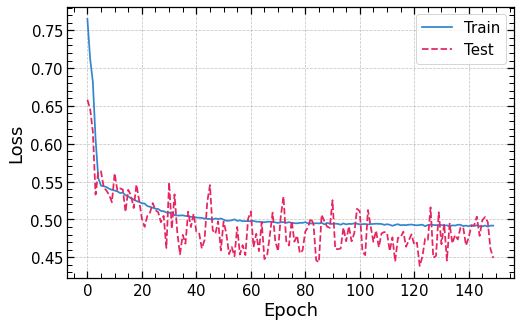

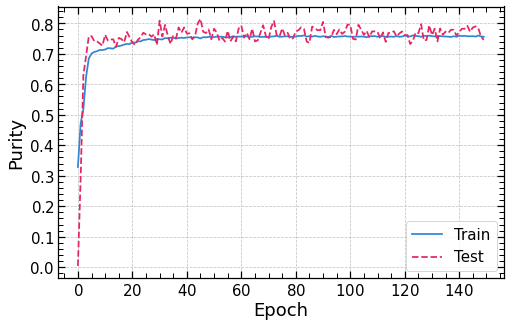

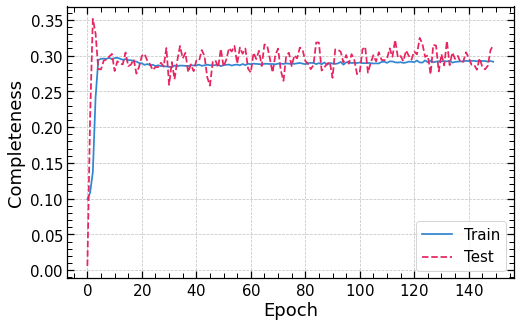

<Figure size 360x360 with 0 Axes>

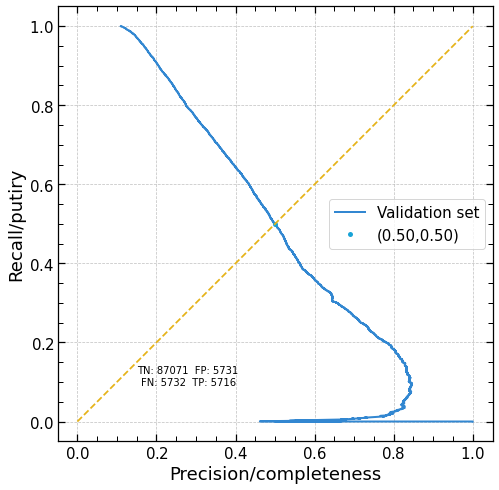

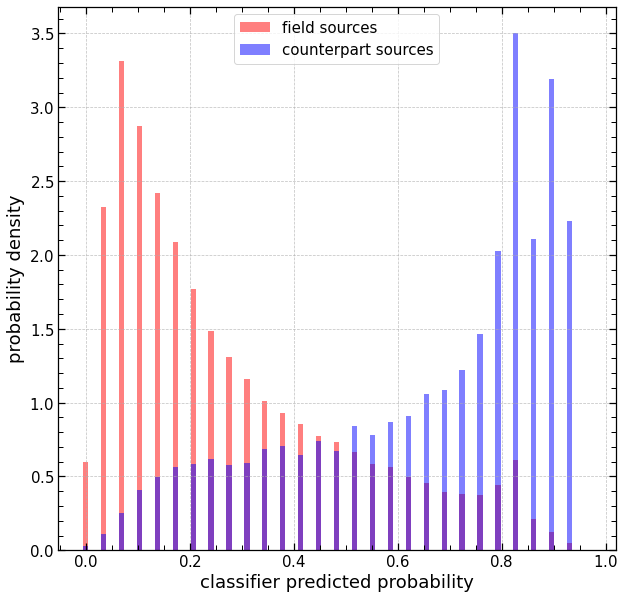

In [62]:
plot_metrics(history_grz)
_,_,_, hist_df = assess_classifier(model_grz, X_val, y_val);

if not load_models:  save_keras_classifier(model_grz, hist_df, 'model/nnmag_grz')


## GRZW1W2W3W4 data - best possible model

In [63]:
learning_dict = photo_prior_create_train_test_validation_data(photo_cat_scaled=photo_cat_scaled, features_cols = 'grzw1w2w3w4')

total x-ray sources:  19769
total non-x-ray sources:  46342
total sources:  66111
number of x-ray sources per flux bin:
x_ray_flux_bin
0    19769
dtype: int64
number of non-x-ray sources per flux bin:
x_ray_flux_bin
0    46342
dtype: int64
x-ray flux bins:
[3.00100307e-15 9.70410542e-12]
********************
flux bin:  3.0010030697394e-15 9.7041054224882e-12
train features: 
  ['mag_g', 'mag_r', 'mag_z', 'mag_w1', 'mag_w2', 'mag_w3', 'mag_w4', 'col_gr', 'col_rz', 'col_gz', 'col_zw1', 'col_rw2', 'col_w1w2', 'col_zw3', 'col_rw4', 'col_w3w4']
train size examples - filed:  25952
train size examples - x-ray: 11070
test size examples - filed:  6488
test size examples - x-ray 2768
validation size examples - filed:  13902
validation size examples - x-ray: 5931
downsampled field sources:  False
data is scaled


In [64]:
X_train, y_train, X_test, y_test, X_val, y_val, class_weight_train = learning_dict[0]['X_train'], learning_dict[0]['y_train'], learning_dict[0]['X_test'], learning_dict[0]['y_test'], learning_dict[0]['X_val'], learning_dict[0]['y_val'], learning_dict[0]['class_weight_train']
initial_bias = np.log([np.sum(y_test)/np.sum(~y_test)])

model_grzw1w2w3w4, early_stopping = build_keras_model(input_features_shape=X_train.shape[1],
                                    activation='tanh',
                                    layers_num=(8,8,8,8),
                                    dropout_rate=0.1,
                                    initial_bias=initial_bias,)

if load_models:
    model_grzw1w2w3w4 = tf.keras.models.load_model('model/nnmag_grzw1w2w3w4.keras_nn')
    history_grzw1w2w3w4 =  pickle.load(open('model/nnmag_grzw1w2w3w4.keras_nn/history', "rb"))
    history_grzw1w2w3w4['epoch'] = np.arange(len(history_grzw1w2w3w4['loss']))


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 8)                 136       
                                                                 
 dense_66 (Dense)            (None, 8)                 72        
                                                                 
 dropout_35 (Dropout)        (None, 8)                 0         
                                                                 
 dense_67 (Dense)            (None, 8)                 72        
                                                                 
 dropout_36 (Dropout)        (None, 8)                 0         
                                                                 
 dense_68 (Dense)            (None, 8)                 72        
                                                                 
 dropout_37 (Dropout)        (None, 8)               

In [65]:
if not load_models: 
    history_grzw1w2w3w4 = model_grzw1w2w3w4.fit(
    X_train,
    y_train,
    batch_size=500,
    epochs=150,
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping],
    class_weight=class_weight_train,
    verbose=0)



    with open('model/nnmag_grzw1w2w3w4.keras_nn/history', 'wb') as file_pi:
        pickle.dump(history_grzw1w2w3w4.history, file_pi)


Optimal threshold: 0.68
Optimal precision: 0.81


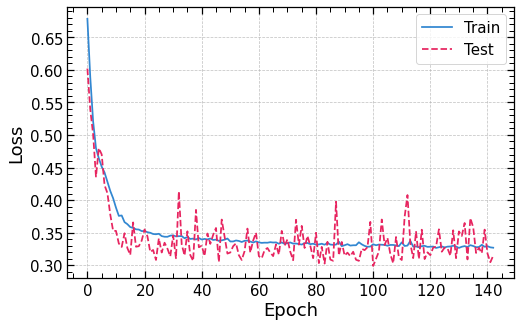

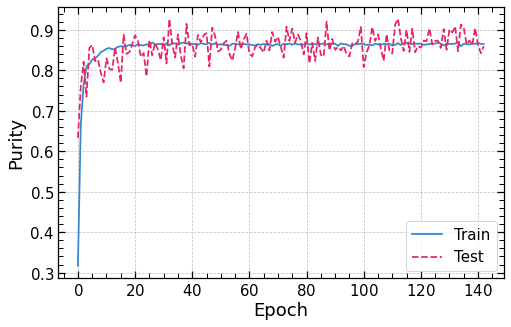

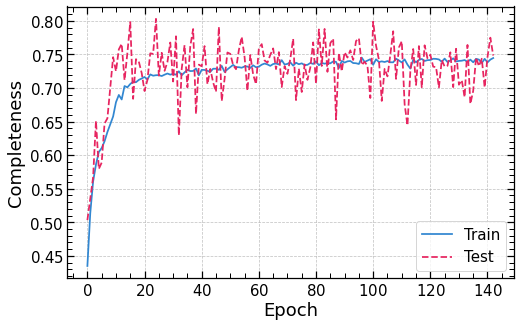

<Figure size 360x360 with 0 Axes>

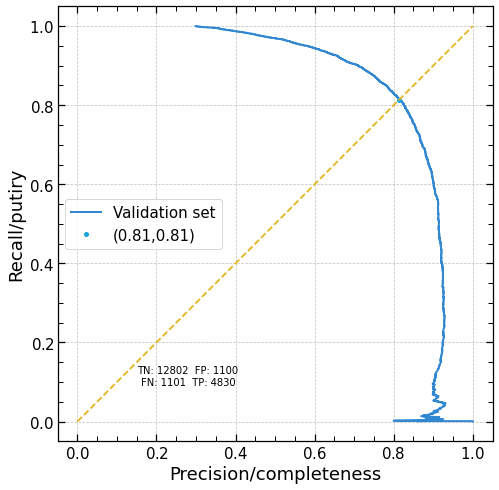

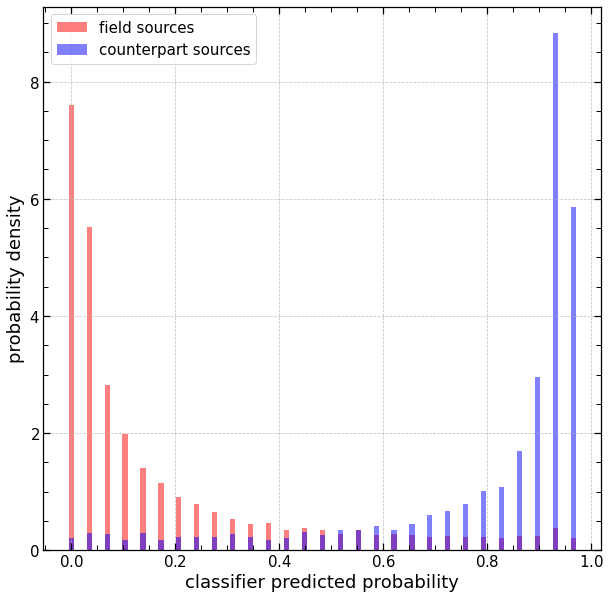

In [66]:
plot_metrics(history_grzw1w2w3w4)
_,_,_, hist_df = assess_classifier(model_grzw1w2w3w4, X_val, y_val);

if not load_models: save_keras_classifier(model_grzw1w2w3w4, hist_df, 'model/nnmag_grzw1w2w3w4')


# Testing loaded models on a portion of LH desi data

In [67]:
#load this array:
# mag_g                          2.915254/35
# mag_r                          2.087654/35
# mag_z                           1.72228/35
# mag_w1                         5.013193/35
# mag_w2                         5.196579/35
# mag_w3                         7.574195/35
# mag_w4                         8.353606/35
# col_gr                           0.8276/10
# col_rz                         0.365374/10
# col_gz                         1.192974/10
# col_zw1                       -3.290913/10
# col_rw2                       -3.108925/10
# col_w1w2                      -0.183386/10
# col_zw3                       -5.851915/10
# col_rw4                       -6.265952/10
# col_w3w4                      -0.779411/10

array = np.array([
    [2.915254/35, 2.087654/35, 1.72228/35, 5.013193/35, 5.196579/35, 7.574195/35, 8.353606/35, 0.8276/10, 0.365374/10, 1.192974/10, -3.290913/10, -3.108925/10, -0.183386/10, -5.851915/10, -6.265952/10, -0.779411/10]])


In [68]:
model_grzw1w2w3w4.predict(array)

1/1 [==============================] - 0s 16ms/step


array([[0.97310656]], dtype=float32)